In [1]:
import pandas as pd
import os

### Load the data

In [2]:
for file in os.listdir('data'):
    print(file)

friday.csv
wednesday.csv
monday.csv
thursday.csv
tuesday.csv


In [3]:
df_list = []
for file in os.listdir('data'):
    if file.endswith('.csv'):
        df = pd.read_csv(f"data/{file}", sep=";", parse_dates=True, index_col='timestamp')
        df_list.append(df)
df = pd.concat(df_list, sort=True)

In [4]:
df

,customer_no,location
timestamp,,
2019-09-06 07:00:00,1,dairy
2019-09-06 07:00:00,2,drinks
2019-09-06 07:00:00,3,fruit
2019-09-06 07:01:00,2,checkout
2019-09-06 07:01:00,4,drinks
...,...,...
2019-09-03 21:47:00,1421,drinks
2019-09-03 21:47:00,1422,dairy
2019-09-03 21:48:00,1421,checkout


In [5]:
df['time'] = df.index.time

In [6]:
df['day'] = df.index.day_name()

In [7]:
df.sort_index(inplace=True)

In [8]:
df['customer_no'].astype(str)

timestamp
2019-09-02 07:03:00       1
2019-09-02 07:03:00       2
2019-09-02 07:04:00       4
2019-09-02 07:04:00       8
2019-09-02 07:04:00       7
                       ... 
2019-09-06 21:50:00    1507
2019-09-06 21:50:00    1508
2019-09-06 21:50:00    1509
2019-09-06 21:50:00    1510
2019-09-06 21:50:00    1496
Name: customer_no, Length: 24877, dtype: object

In [9]:
df['customer_id'] = df['day'] + "-" + df['customer_no'].astype(str)

In [10]:
df['customer_id']

timestamp
2019-09-02 07:03:00       Monday-1
2019-09-02 07:03:00       Monday-2
2019-09-02 07:04:00       Monday-4
2019-09-02 07:04:00       Monday-8
2019-09-02 07:04:00       Monday-7
                          ...     
2019-09-06 21:50:00    Friday-1507
2019-09-06 21:50:00    Friday-1508
2019-09-06 21:50:00    Friday-1509
2019-09-06 21:50:00    Friday-1510
2019-09-06 21:50:00    Friday-1496
Name: customer_id, Length: 24877, dtype: object

### Set 'section_order'
(first, following, ...)

In [11]:
enter_datetimes = df.reset_index().groupby('customer_id')['timestamp'].min()

In [12]:
enter_datetimes

customer_id
Friday-1        2019-09-06 07:00:00
Friday-10       2019-09-06 07:06:00
Friday-100      2019-09-06 08:03:00
Friday-1000     2019-09-06 17:19:00
Friday-1001     2019-09-06 17:19:00
                        ...        
Wednesday-995   2019-09-04 16:52:00
Wednesday-996   2019-09-04 16:52:00
Wednesday-997   2019-09-04 16:52:00
Wednesday-998   2019-09-04 16:53:00
Wednesday-999   2019-09-04 16:53:00
Name: timestamp, Length: 7445, dtype: datetime64[ns]

In [13]:
for customer in df['customer_id'].unique():
    df.loc[(df.customer_id == customer) & (df.index == enter_datetimes[customer]), 'section_order'] = 'first'

In [14]:
df.loc[df['location'] == 'checkout', 'section_order'] = 'checkout'

In [15]:
df['section_order'].fillna('following', inplace=True)

In [16]:
df.head(20)

,customer_no,location,time,day,customer_id,section_order
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,07:03:00,Monday,Monday-1,first
2019-09-02 07:03:00,2,dairy,07:03:00,Monday,Monday-2,first
2019-09-02 07:04:00,4,dairy,07:04:00,Monday,Monday-4,first
2019-09-02 07:04:00,8,fruit,07:04:00,Monday,Monday-8,first
2019-09-02 07:04:00,7,spices,07:04:00,Monday,Monday-7,first
2019-09-02 07:04:00,3,dairy,07:04:00,Monday,Monday-3,first
2019-09-02 07:04:00,5,spices,07:04:00,Monday,Monday-5,first
2019-09-02 07:04:00,6,spices,07:04:00,Monday,Monday-6,first
2019-09-02 07:05:00,1,checkout,07:05:00,Monday,Monday-1,checkout


### Calculate probabilities for first section

In [17]:
customers_in_first_sections = df[df.section_order == 'first'].groupby('location')[['customer_id']].count()
customers_in_first_sections

,customer_id
location,
dairy,2141
drinks,1143
fruit,2810
spices,1351


In [18]:
total_entries = sum(customers_in_first_sections['customer_id'].to_list())

In [19]:
first_probabilities = customers_in_first_sections / total_entries
first_probabilities

,customer_id
location,
dairy,0.287576
drinks,0.153526
fruit,0.377435
spices,0.181464


In [20]:
first_probabilities = first_probabilities['customer_id'].to_list().copy()
first_probabilities

[0.2875755540631296,
 0.15352585627938214,
 0.3774345198119543,
 0.18146406984553393]

In [21]:
# Probability for customer to enter section 'dairy' first
first_probabilities[0] 

0.2875755540631296

In [22]:
# Probability for customer to enter section 'drinks' first
first_probabilities[1]

0.15352585627938214

### Calculate the total number of customers in each section

In [23]:
# absolute number of customers pers section
df.groupby('location')[['customer_id']].count().sort_values('customer_id', ascending=False)

,customer_id
location,
checkout,7417
fruit,5122
dairy,4679
drinks,3905
spices,3754


In [24]:
# daily average of customers per section
round(df.groupby('location')[['customer_id']].count().sort_values('customer_id', ascending=False) / 5, 0).astype(int)

,customer_id
location,
checkout,1483
fruit,1024
dairy,936
drinks,781
spices,751


### Calculate the total number of customers in each section over time

In [25]:
# average number of customers per minute and location
customers_in_section_over_time = df.groupby([df.time, df.location])[['customer_id']].count() / 5
customers_in_section_over_time

customer_id
time     location             
07:00:00 dairy             0.6
         drinks            0.6
         fruit             0.8
07:01:00 checkout          0.4
         dairy             0.8
...                        ...
21:50:00 checkout          0.4
         dairy             0.6
         drinks            0.2
         fruit             0.4
         spices            0.2

[4383 rows x 1 columns]

In [26]:
# total number of customers per timestamp and location
customers_in_section_over_time = df.groupby([df.index, df.location])[['customer_id']].count()
customers_in_section_over_time

customer_id
timestamp           location             
2019-09-02 07:03:00 dairy               2
2019-09-02 07:04:00 dairy               2
                    fruit               1
                    spices              3
2019-09-02 07:05:00 checkout            2
...                                   ...
2019-09-06 21:50:00 checkout            2
                    dairy               1
                    drinks              1
                    fruit               1
                    spices              1

[13839 rows x 1 columns]

### Display the number of customers at checkout over time

In [27]:
# average number of customers at checkout per minute
checkouts = df[df.location == 'checkout']
checkouts.groupby([checkouts.time, checkouts.location])[['location']].count() / 5

,,location
time,location,
07:01:00,checkout,0.4
07:02:00,checkout,1.0
07:03:00,checkout,0.2
07:04:00,checkout,0.4
07:05:00,checkout,1.4
...,...,...
21:46:00,checkout,1.0
21:47:00,checkout,1.0
21:48:00,checkout,1.4


In [28]:
# absolute number of customers at checkout per timestamp
checkouts = df[df.location == 'checkout']
checkouts.groupby([checkouts.index, checkouts.location])[['location']].count()

,,location
timestamp,location,
2019-09-02 07:05:00,checkout,2
2019-09-02 07:06:00,checkout,2
2019-09-02 07:07:00,checkout,1
2019-09-02 07:08:00,checkout,3
2019-09-02 07:09:00,checkout,1
...,...,...
2019-09-06 21:37:00,checkout,1
2019-09-06 21:45:00,checkout,1
2019-09-06 21:47:00,checkout,2


### Calculate the time each customer spent in the market

In [29]:
enter_datetime = df.reset_index()[['timestamp', 'customer_id']].groupby('customer_id').min()
enter_datetime.rename(columns={'timestamp': 'enter_datetime'}, inplace=True)
enter_datetime.sort_values('enter_datetime')

,enter_datetime
customer_id,
Monday-1,2019-09-02 07:03:00
Monday-2,2019-09-02 07:03:00
Monday-4,2019-09-02 07:04:00
Monday-3,2019-09-02 07:04:00
Monday-5,2019-09-02 07:04:00
...,...
Friday-1506,2019-09-06 21:48:00
Friday-1507,2019-09-06 21:48:00
Friday-1508,2019-09-06 21:48:00


In [30]:
exit_datetime = df.reset_index()[['timestamp', 'customer_id']].groupby('customer_id').max()
exit_datetime.rename(columns={'timestamp': 'exit_datetime'}, inplace=True)
exit_datetime.sort_values('exit_datetime')

,exit_datetime
customer_id,
Monday-1,2019-09-02 07:05:00
Monday-5,2019-09-02 07:05:00
Monday-3,2019-09-02 07:06:00
Monday-2,2019-09-02 07:06:00
Monday-8,2019-09-02 07:07:00
...,...
Friday-1500,2019-09-06 21:50:00
Friday-1510,2019-09-06 21:50:00
Friday-1496,2019-09-06 21:50:00


In [31]:
customer_time_spent = pd.concat([enter_datetime, exit_datetime], axis=1)
customer_time_spent['time_spent'] = customer_time_spent['exit_datetime'] - customer_time_spent['enter_datetime']
customer_time_spent.sort_values('enter_datetime')

,enter_datetime,exit_datetime,time_spent
customer_id,,,
Monday-1,2019-09-02 07:03:00,2019-09-02 07:05:00,00:02:00
Monday-2,2019-09-02 07:03:00,2019-09-02 07:06:00,00:03:00
Monday-4,2019-09-02 07:04:00,2019-09-02 07:08:00,00:04:00
Monday-3,2019-09-02 07:04:00,2019-09-02 07:06:00,00:02:00
Monday-5,2019-09-02 07:04:00,2019-09-02 07:05:00,00:01:00
...,...,...,...
Friday-1506,2019-09-06 21:48:00,2019-09-06 21:48:00,00:00:00
Friday-1507,2019-09-06 21:48:00,2019-09-06 21:50:00,00:02:00
Friday-1508,2019-09-06 21:48:00,2019-09-06 21:50:00,00:02:00


### Calculate the total number of customers present in the supermarket over time

In [32]:
# Create default timestamp for missing exit_datetime values (assuming that customers are leaving, when the market closes)
default_exit_datetime = pd.to_datetime('21:51:00').time()
default_exit_datetime

datetime.time(21, 51)

In [33]:
customer_time_spent.isna().sum()

enter_datetime    0
exit_datetime     0
time_spent        0
dtype: int64

In [34]:
# Fill missing exit_datetime values
customer_time_spent['exit_datetime'].fillna(default_exit_datetime, inplace=True)

In [35]:
pd.date_range(customer_time_spent['enter_datetime']["Friday-1"] + pd.to_timedelta(1, unit='min'), customer_time_spent['exit_datetime']["Friday-1"] - pd.to_timedelta(1, unit='min'), freq='Min')

DatetimeIndex(['2019-09-06 07:01:00', '2019-09-06 07:02:00',
               '2019-09-06 07:03:00', '2019-09-06 07:04:00'],
              dtype='datetime64[ns]', freq='T')

In [36]:
# Define function to extract all minutes, where customer is present
def get_customer_presence(customer_id):
    """returns DataFrame with all minutes where customer is present"""
    customer_presence = pd.date_range(customer_time_spent['enter_datetime'][customer_id] + pd.to_timedelta(1, unit='min'), customer_time_spent['exit_datetime'][customer_id] - pd.to_timedelta(1, unit='min'), freq='Min')
    return pd.DataFrame(zip(customer_presence,[customer_id] * len(customer_presence)))

In [37]:
# Initialise empty DataFrame
init_df = pd.DataFrame()
last_df = init_df

In [38]:
# Concat all timestamp values of all customers
for customer in df['customer_id'].unique():
    current_df = get_customer_presence(customer)
    combined = pd.concat([last_df, current_df], axis=0)
    last_df = combined

In [39]:
total_customers = combined.rename(columns={0:'timestamp', 1:'customer_id'})

In [40]:
total_customers.set_index('timestamp', inplace=True)

In [41]:
full_data = pd.concat([total_customers, df], axis=0, sort=True)

In [42]:
full_data.sort_index(inplace=True)

In [43]:
full_data.reset_index(inplace=True)

In [44]:
full_data.drop_duplicates(['timestamp', 'customer_id'], inplace=True)

In [45]:
final_data = full_data.sort_values(by=['customer_id', 'timestamp']).set_index('timestamp').copy()

In [46]:
final_data[100:150]

,customer_id,customer_no,day,location,section_order,time
timestamp,,,,,,
2019-09-06 17:21:00,Friday-1008,1008.0,Friday,fruit,first,17:21:00
2019-09-06 17:22:00,Friday-1008,NaN,NaN,NaN,NaN,NaN
2019-09-06 17:23:00,Friday-1008,NaN,NaN,NaN,NaN,NaN
2019-09-06 17:24:00,Friday-1008,NaN,NaN,NaN,NaN,NaN
2019-09-06 17:25:00,Friday-1008,NaN,NaN,NaN,NaN,NaN
2019-09-06 17:26:00,Friday-1008,NaN,NaN,NaN,NaN,NaN
2019-09-06 17:27:00,Friday-1008,NaN,NaN,NaN,NaN,NaN
2019-09-06 17:28:00,Friday-1008,1008.0,Friday,checkout,checkout,17:28:00
2019-09-06 17:22:00,Friday-1009,1009.0,Friday,dairy,first,17:22:00


In [47]:
final_data['location'].fillna(method='ffill', inplace=True)
final_data['section_order'].fillna(method='ffill', inplace=True)
final_data['customer_no'].fillna(method='ffill', inplace=True)
final_data['customer_no'].astype(int)

timestamp
2019-09-06 07:00:00      1
2019-09-06 07:01:00      1
2019-09-06 07:02:00      1
2019-09-06 07:03:00      1
2019-09-06 07:04:00      1
                      ... 
2019-09-04 16:57:00    998
2019-09-04 16:58:00    998
2019-09-04 16:59:00    998
2019-09-04 16:53:00    999
2019-09-04 16:54:00    999
Name: customer_no, Length: 53903, dtype: int64

In [48]:
final_data['day'] = final_data.index.day_name()
final_data['time'] = final_data.index.time

In [49]:
# average number of customers present per minute
final_data.groupby('time')[['customer_id']].count() / 5

,customer_id
time,
07:00:00,2.0
07:01:00,3.2
07:02:00,3.6
07:03:00,5.0
07:04:00,6.8
...,...
21:46:00,6.8
21:47:00,6.6
21:48:00,6.6


In [50]:
# total number of customers present at any given timestamp
final_data.groupby('timestamp')[['customer_id']].count()

,customer_id
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,8
2019-09-02 07:05:00,8
2019-09-02 07:06:00,12
2019-09-02 07:07:00,12
...,...
2019-09-06 21:46:00,6
2019-09-06 21:47:00,8
2019-09-06 21:48:00,10


In [51]:
pd.to_datetime('07:00').time()

datetime.time(7, 0)

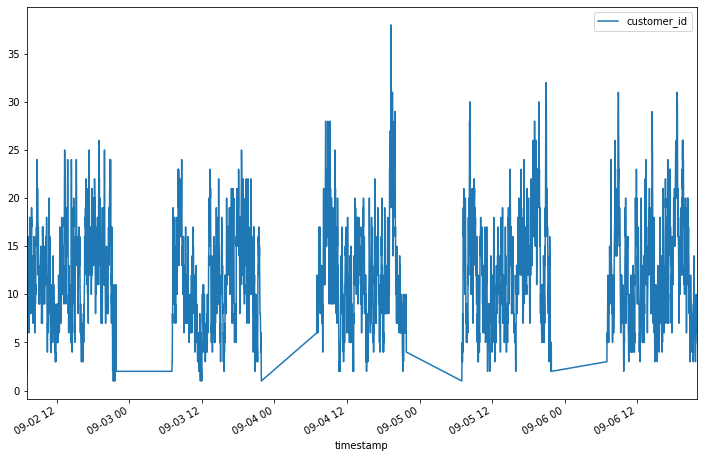

In [52]:
# distribution over week
final_data.groupby(final_data.index)[['customer_id']].count().plot(figsize=(12,8))

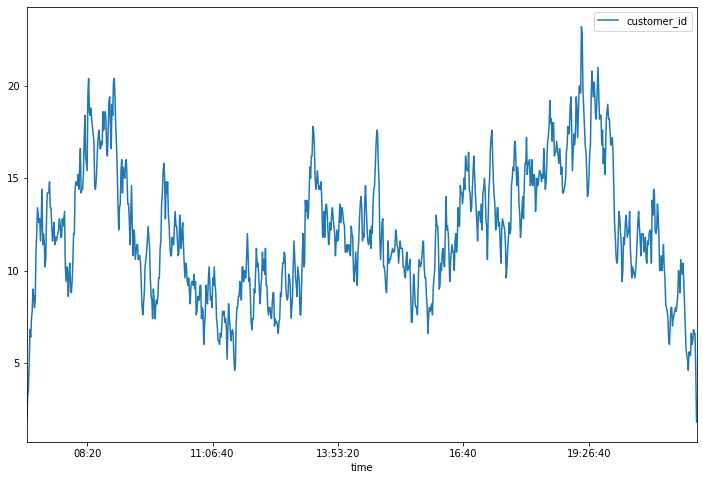

In [53]:
# daily distribution
(final_data.groupby(final_data.time)[['customer_id']].count() / 5).plot(figsize=(12,8))

### Plot the distribution of customers of their first visited section versus following sections

In [54]:
# Our business managers think that the first section customers 
# visit follows a different pattern than the following ones. 
# Plot the distribution of customers of their first visited section 
# versus following sections (treat all sections visited 
# after the first as “following”).

In [55]:
customers_in_first = (final_data[final_data['section_order'] == 'first'].groupby(['time'])[['customer_id']].count() / 5)
customers_in_following = (final_data[final_data['section_order'] == 'following'].groupby(['time'])[['customer_no']].count() / 5)

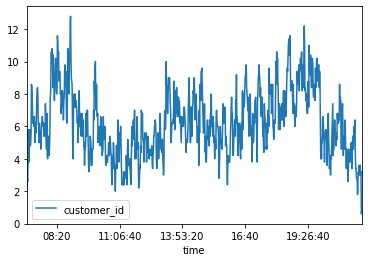

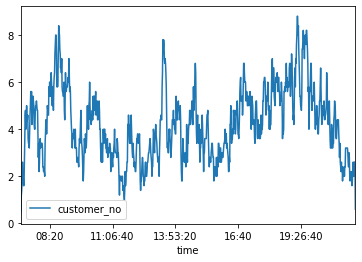

In [56]:
customers_in_first.plot()
customers_in_following.plot()

### Estimate the total revenue per customer

In [57]:
revenues = pd.DataFrame({'location':['fruit', 'spices', 'dairy', 'drinks'], 'revenue':[4,3,5,6]})
revenues

,location,revenue
0,fruit,4
1,spices,3
2,dairy,5
3,drinks,6


In [58]:
final_data.loc[final_data['location'] == 'fruit', 'revenue'] = '4'
final_data.loc[final_data['location'] == 'spices', 'revenue'] = '3'
final_data.loc[final_data['location'] == 'dairy', 'revenue'] = '5'
final_data.loc[final_data['location'] == 'drinks', 'revenue'] = '6'
final_data.loc[final_data['location'] == 'checkout', 'revenue'] = '0'

In [59]:
final_data['customer_no'] = final_data.customer_no.astype(int)

In [60]:
final_data['revenue'] = final_data['revenue'].astype(int)

In [61]:
final_data.groupby('customer_id')[['revenue']].sum().sort_values('revenue', ascending=False)

,revenue
customer_id,
Thursday-1047,281
Monday-666,270
Friday-102,265
Wednesday-710,252
Monday-109,227
...,...
Wednesday-829,3
Monday-912,3
Monday-1250,3


### Which is the most profitable section according to your data?

In [62]:
final_data.groupby('location')[['revenue']].sum().sort_values(by='revenue', ascending=False)

,revenue
location,
dairy,82385
fruit,54684
drinks,48990
spices,24519
checkout,0


### Get Transition Propabilities

In [63]:
final_data = final_data.sort_values(['timestamp', 'customer_no'])
final_data

,customer_id,customer_no,day,location,section_order,time,revenue
timestamp,,,,,,,
2019-09-02 07:03:00,Monday-1,1,Monday,dairy,first,07:03:00,5
2019-09-02 07:03:00,Monday-2,2,Monday,dairy,first,07:03:00,5
2019-09-02 07:04:00,Monday-1,1,Monday,dairy,first,07:04:00,5
2019-09-02 07:04:00,Monday-2,2,Monday,dairy,first,07:04:00,5
2019-09-02 07:04:00,Monday-3,3,Monday,dairy,first,07:04:00,5
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,Friday-1500,1500,Friday,dairy,following,21:50:00,5
2019-09-06 21:50:00,Friday-1507,1507,Friday,checkout,checkout,21:50:00,0
2019-09-06 21:50:00,Friday-1508,1508,Friday,checkout,checkout,21:50:00,0


In [64]:
final_data[final_data['customer_id'] == 'Monday-7']

,customer_id,customer_no,day,location,section_order,time,revenue
timestamp,,,,,,,
2019-09-02 07:04:00,Monday-7,7,Monday,spices,first,07:04:00,3
2019-09-02 07:05:00,Monday-7,7,Monday,drinks,following,07:05:00,6
2019-09-02 07:06:00,Monday-7,7,Monday,drinks,following,07:06:00,6
2019-09-02 07:07:00,Monday-7,7,Monday,drinks,following,07:07:00,6
2019-09-02 07:08:00,Monday-7,7,Monday,drinks,following,07:08:00,6
2019-09-02 07:09:00,Monday-7,7,Monday,spices,following,07:09:00,3
2019-09-02 07:10:00,Monday-7,7,Monday,spices,following,07:10:00,3
2019-09-02 07:11:00,Monday-7,7,Monday,fruit,following,07:11:00,4
2019-09-02 07:12:00,Monday-7,7,Monday,fruit,following,07:12:00,4


In [65]:
pre_crosstab = final_data.reset_index().set_index('customer_id').sort_values(['customer_no', 'timestamp'])

In [66]:
pre_crosstab['next_location'] = pre_crosstab['location'].shift(-1)

In [67]:
pre_crosstab_final = pre_crosstab[pre_crosstab['location'] != 'checkout'].copy()

In [89]:
P_w_checkout = pd.crosstab(pre_crosstab['location'], pre_crosstab['next_location'], normalize=0)

In [86]:
P = pd.crosstab(pre_crosstab_final['location'], pre_crosstab_final['next_location'], normalize=0)

In [87]:
P

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.119925,0.799357,0.029738,0.024580,0.026400
drinks,0.199020,0.015432,0.704103,0.040661,0.040784
fruit,0.187185,0.040889,0.027503,0.718309,0.026114
spices,0.153799,0.059342,0.051022,0.037930,0.697908


In [80]:
P.loc['dairy'].to_list()

[0.11992474358196274,
 0.7993566790071008,
 0.0297384232566608,
 0.024579717181525764,
 0.026400436972749894]

In [ ]:
### Draw transition probabilities

In [90]:
import pygraphviz as pgv
import numpy as np


locations = ['dairy', 'spices', 'drinks', 'fruit', 'checkout']
G = pgv.AGraph(directed=True)
for start_location in locations:
    for end_location in locations:
        G.add_edge(start_location, end_location, label=np.round(P_w_checkout.loc[start_location, end_location],2))

G.draw('transition.png', prog='dot')

In [ ]:
def increment():
    i = 1
    while True:
        yield i
        i = i + 1          
auto_increment = increment()


class Customer:
    """
    Customer in a supermarket simulation.
    
    Parameters
    ----------
    customer_nr: Id of the customer.
    current_location: The current location of the customer in the supermarket.
    """
    
    
    def __init__(self):
        self.current_location = np.random.choice(['dairy', 'spices', 'drinks', 'fruit'], p=first_probabilities)
        new_customer_nr = next(auto_increment)
        self.customer_nr = new_customer_nr
 

    def __repr__(self):
        return f"""Customer {self.customer_nr} is in section '{self.current_location}'.""" 
    
    
    def transition(self):
        """
        Defines how the customer transitions between states/location.
        """
        if self.current_location == 'dairy':
            self.current_location = np.random.choice(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], p=P.loc['dairy'].to_list())
        elif self.current_location == 'drinks':
            self.current_location = np.random.choice(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], p=P.loc['drinks'].to_list())
        elif self.current_location == 'fruit':
            self.current_location = np.random.choice(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], p=P.loc['fruit'].to_list())
        elif self.current_location == 'spices':
            self.current_location = np.random.choice(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], p=P.loc['spices'].to_list())
        elif self.current_location == 'checkout':
            self.current_location = 'has left the supermarket'
        elif self.current_location == 'has left the supermarket':
            ...
        return self.current_location

In [ ]:
for _ in range(10):
    customer = Customer()
    print(customer)
    customer.transition()
    print(customer)
    customer.transition()
    print(customer)